In [0]:
import sklearn.datasets as dt

In [0]:
bre=dt.load_breast_cancer()

In [161]:
bre.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
import pandas as pd
import numpy as np

In [0]:
data=pd.DataFrame(bre.data,columns=bre.feature_names)

In [164]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
data['class']=bre.target

In [166]:
x=data.drop(['class'],axis=1)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [167]:
#@title Default title text
y=data['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

In [170]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(512, 30) (57, 30) (512,) (57,)


# Perceptron class

In [0]:
class perceptron:
  def __init__ (self):
    self.w=None
    self.b=None
  def Model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0
  def predict(self,x):
    y=[]
    for x1 in x:
      y1=self.Model(x1)
      y.append(y1)
    return np.array(y)
  def fit(self,x,y):
    self.w=np.ones(x.shape[1])
    self.b=0
    for x1,y1 in zip(x,y):
        m1=self.Model(x1)
        if m1==0 and y1==1:
          self.w=self.w+x1
          self.b=self.b+1
        elif m1==1 and y1==0:
          self.w=self.w-x1
          self.b=self.b-1 
      
  
      




In [200]:
"""converting dataframe to ndarray"""

x_train=x_train.values
x_test=x_test.values

AttributeError: ignored

In [0]:
m2=perceptron()

In [0]:
m2.fit(x_train,y_train)

In [204]:
m3=m2.predict(x_train)
a11=accuracy_score(m3,y_train)
a11
#print(sum(m3),"a",y_train,m3)

0.373046875

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
m4=m2.predict(x_test)

In [0]:
a1=accuracy_score(y_test,m4)

In [179]:
a1

0.631578947368421

# FOR BETTER ACCURACY WE USE EPOCH

In [0]:
import matplotlib.pyplot as plt

In [0]:
class p:
  def __init__ (self):
    self.w=None
    self.b=None
  def Model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0
  def predict(self,x):
    y=[]
    for x1 in x:
      y1=self.Model(x1)
      y.append(y1)
    return np.array(y)
  def fit(self,x,y,epochs=1):
    self.w=np.ones(x.shape[1])
    self.b=0
    max1=0
    acc={}
    for i in range(epochs):
      for x1,y1 in zip(x,y):
        m1=self.Model(x1)
        if m1==0 and y1==1:
          self.w=self.w+x1
          self.b=self.b+1
        elif m1==1 and y1==0:
          self.w=self.w-x1
          self.b=self.b-1 
      acc[i]=accuracy_score(self.predict(x),y)
      if(acc[i]>max1):
        max1=acc[i]
    plt.plot(*zip(*sorted(acc.items())))
    plt.show()  
    return max1

    #plt.plot(a)
    #plt.show()  


In [0]:
p1=p()

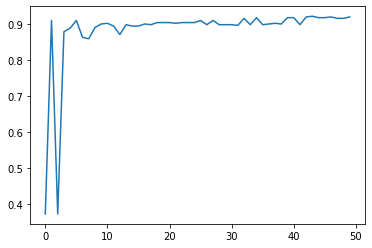

0.921875

In [211]:
a6=p1.fit(x_train,y_train,50)
a6

#CHECKPOINTING TO GET MAXIMUM VALUE OF PARAMETERS

In [0]:
class p:
  def __init__ (self):
    self.w=None
    self.b=None
  def Model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0
  def predict(self,x):
    y=[]
    for x1 in x:
      y1=self.Model(x1)
      y.append(y1)
    return np.array(y)
  def fit(self,x,y,epochs=1):
    self.w=np.ones(x.shape[1])
    self.b=0
    max1=0
    acc={}
    for i in range(epochs):
      for x1,y1 in zip(x,y):
        m1=self.Model(x1)
        if m1==0 and y1==1:
          self.w=self.w+x1
          self.b=self.b+1
        elif m1==1 and y1==0:
          self.w=self.w-x1
          self.b=self.b-1 
      acc[i]=accuracy_score(self.predict(x),y)
      if(acc[i]>max1):
        max1=acc[i]
        check1=self.w
        check2=self.b
    self.w=check1
    self.b=check2    
    plt.plot(*zip(*sorted(acc.items())))
    plt.show()  
    return max1

    #plt.plot(a)
    #plt.show()  


In [0]:
m3=p()


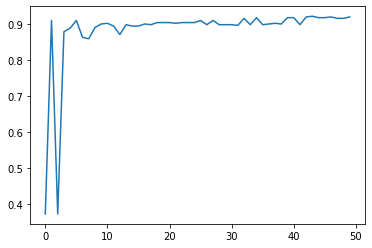

0.921875

In [217]:
a4=m3.fit(x_train,y_train,50)
a4

In [0]:
acc=accuracy_score(m3.predict(x_train),y_train)

In [218]:
acc   #which is equal to maximum accuracy return by fit function

0.921875

# Learning rate 

In [0]:
class p:
  def __init__ (self):
    self.w=None
    self.b=None
  def Model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0
  def predict(self,x):
    y=[]
    for x1 in x:
      y1=self.Model(x1)
      y.append(y1)
    return np.array(y)
  def fit(self,x,y,epochs=1,alpha=1):
    self.w=np.ones(x.shape[1])
    self.b=0
    max1=0
    acc={}
    for i in range(epochs):
      for x1,y1 in zip(x,y):
        m1=self.Model(x1)
        if m1==0 and y1==1:
          self.w=self.w+alpha*x1
          self.b=self.b+alpha*1
        elif m1==1 and y1==0:
          self.w=self.w-alpha*x1
          self.b=self.b-alpha*1 
      acc[i]=accuracy_score(self.predict(x),y)
      if(acc[i]>max1):
        max1=acc[i]
        check1=self.w
        check2=self.b
    self.w=check1
    self.b=check2    
    plt.plot(*zip(*sorted(acc.items())))
    plt.ylim([0,1])
    plt.show()  
    return max1

    #plt.plot(a)
    #plt.show()  


In [0]:
m5=p()